In [1]:
"""
Alignes images and pads them to get a cuboidal stack
Requires opencv3, rh-logger, rh-config as well"""

import aligner
import matplotlib.pyplot as plt
%matplotlib inline

/home/sai/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Set parameters to run Affine Alignment.
# imgs_dir: h5 file contaning 
# conf_fname: file contaning hyperparameter values for feature detector and matcher.
imgs_dir = 'imgs_small.h5'
conf_fname = 'conf.yaml'
process_num = 8

In [3]:
# Except for the helper function, we simply use Adi's code

_, imgs, transforms = aligner.get_transforms(imgs_dir, conf_fname, process_num)

INFO:align_imgs:Starting process: aligner.py ([10, {'detector_type': 'ORB', 'detector_params': {'nfeatures': 10000}, 'out_path': './analysis/AKAZE', 'matcher_params': {'min_features_num': 10, 'det_delta': 0.95, 'max_epsilon': 20, 'max_stretch': 0.95, 'ROD_cutoff': 0.9, 'max_trust': 3, 'model_index': 3, 'iterations': 5000, 'min_num_inlier': 0.01, 'min_inlier_ratio': 0.01}}])
INFO:align_imgs:Computing features...


Using config file: conf.yaml.


INFO:align_imgs:Img 0, found 10000 features.
INFO:align_imgs:Img 1, found 10000 features.
INFO:align_imgs:Img 2, found 10000 features.
INFO:align_imgs:Img 3, found 10000 features.
INFO:align_imgs:Img 4, found 10000 features.
INFO:align_imgs:Img 5, found 10000 features.
INFO:align_imgs:Img 6, found 10000 features.
INFO:align_imgs:Img 7, found 10000 features.
INFO:align_imgs:Img 8, found 10000 features.
INFO:align_imgs:Img 9, found 10000 features.
INFO:align_imgs:Features computation took 0.864179134369 seconds.
INFO:align_imgs:Pair-wise feature mathcing...
INFO:align_imgs:Imgs 0 -> 1, found the following transformations
[[ 9.98797672e-01 -2.71874588e-03  3.20711432e+00]
 [ 1.59677610e-04  9.98633720e-01  6.01731592e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
And the average displacement: 12.7851842076 px
INFO:align_imgs:Imgs 1 -> 2, found the following transformations
[[ 9.97167300e-01 -2.57947369e-03  4.51324863e+00]
 [ 1.07670578e-03  9.98160316e-01  4.31725227e+00]
 [ 0.

In [8]:
print("imgs.shape: ", imgs.shape)
print("transforms.shape: ", transforms.shape)

('imgs.shape: ', (10, 1496, 1496))
('transforms.shape: ', (10, 3, 3))


In [14]:
import padding
n_imgs, nTransforms = padding.compute_padding(imgs, transforms)

'''
If we apply transforms[i] on imgs[i], we get the aligned image. 
But some pixels fall in the negative coordinate space. Some of them are are mapped
to locations beyond the height/width of imgs[i]. 
To overcome this, we compute minimum and maximum possible coordinate any image of the stack is 
is mapped on and add an offset to the transforms[i] to get ntrasnforms[i].
Applying ntrasnforms[i] on imgs[i] 
'''

print("n_imgs.shape: ", n_imgs.shape)
print("nTransforms.shape: ", nTransforms.shape)

('n_imgs.shape: ', (10, 1518, 1508))
('nTransforms.shape: ', (10, 3, 3))


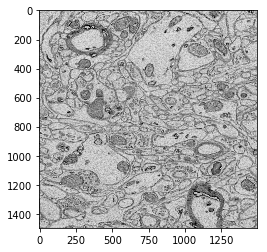

In [9]:
""" Show original image"""
plt.imshow(imgs[0], cmap='gray')

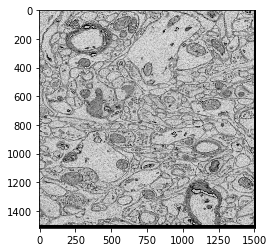

In [12]:
""" Shoe transformed image"""
plt.imshow(n_imgs[0], cmap='gray')

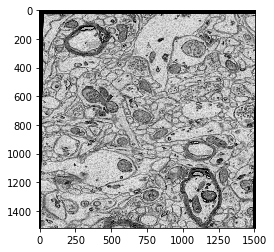

In [13]:
plt.imshow(n_imgs[-1], cmap='gray')